In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pickle as pkl
from descartes import PolygonPatch

from geopy.geocoders import Nominatim
from shapely import wkt

import requests
import pandas as pd
import feedparser
from bs4 import BeautifulSoup
import urllib.request
import urllib3
import json
from pandas.io.json import json_normalize
import numpy as np

# Cincinnati

In [55]:
#census tracts
with open('cinems_bg_pkl_030320', 'rb') as f:
    cinbg = pkl.load(f)
cinbg.columns
cinbg.head()

with open('CincinnatiCensusTracts.pkl', 'rb') as f:
    cintracts = pkl.load(f)
cintracts.columns
cintracts.head()
cinbg.head()

,geometry,GEOID,GIDBG,year_month,Tot_Population_ACS_13_17,pct_Males_ACS_13_17,pct_Pop_18_24_ACS_13_17,pct_Pop_25_44_ACS_13_17,pct_Pop_45_64_ACS_13_17,pct_Pop_65plus_ACS_13_17,pct_Hispanic_ACS_13_17,pct_NH_White_alone_CEN_2010,pct_NH_Blk_alone_ACS_13_17,pct_NH_Asian_alone_ACS_13_17,Med_HHD_Inc_BG_ACS_13_17,pct_Prs_Blw_Pov_Lev_ACS_13_17,Med_House_Value_BG_ACS_13_17,pct_College_ACS_13_17,ems_calls
0,"POLYGON ((-84.55981 39.17130, -84.55954 39.171...",3.906101e+11,3.906101e+11,2017.01,468.0,48.93,5.34,34.83,31.41,4.49,0.0,31.8,57.69,0.0,20655.0,34.4,65000.0,13.6,1
1,"POLYGON ((-84.55981 39.17130, -84.55954 39.171...",3.906101e+11,3.906101e+11,2017.03,468.0,48.93,5.34,34.83,31.41,4.49,0.0,31.8,57.69,0.0,20655.0,34.4,65000.0,13.6,1
2,"POLYGON ((-84.55981 39.17130, -84.55954 39.171...",3.906101e+11,3.906101e+11,2017.04,468.0,48.93,5.34,34.83,31.41,4.49,0.0,31.8,57.69,0.0,20655.0,34.4,65000.0,13.6,1
3,"POLYGON ((-84.55981 39.17130, -84.55954 39.171...",3.906101e+11,3.906101e+11,2017.05,468.0,48.93,5.34,34.83,31.41,4.49,0.0,31.8,57.69,0.0,20655.0,34.4,65000.0,13.6,2
4,"POLYGON ((-84.55981 39.17130, -84.55954 39.171...",3.906101e+11,3.906101e+11,2017.10,468.0,48.93,5.34,34.83,31.41,4.49,0.0,31.8,57.69,0.0,20655.0,34.4,65000.0,13.6,1


In [51]:
cinbg.dtypes

GIDBG                                 int64
State                                 int64
State_name                           object
County                                int64
County_name                          object
Tract                                 int64
Block_group                           int64
Flag                                float64
LAND_AREA                           float64
AIAN_LAND                           float64
URBANIZED_AREA_POP_CEN_2010         float64
URBAN_CLUSTER_POP_CEN_2010          float64
RURAL_POP_CEN_2010                  float64
Tot_Population_CEN_2010             float64
Tot_Population_ACS_13_17            float64
Tot_Population_ACSMOE_13_17         float64
Males_CEN_2010                      float64
Males_ACS_13_17                     float64
Males_ACSMOE_13_17                  float64
Females_CEN_2010                    float64
Females_ACS_13_17                   float64
Females_ACSMOE_13_17                float64
Median_Age_ACS_13_17            

In [56]:
cintracts.TRACTCE10 = cintracts.TRACTCE10.astype(float)
cintracts.TRACTCE10 = cintracts.TRACTCE10 *100

In [4]:
for i in np.unique(cinbg.GIDBG):
    print(i)

390610002001.0
390610007001.0
390610007002.0
390610007003.0
390610009001.0
390610009002.0
390610010001.0
390610010002.0
390610011001.0
390610016001.0
390610016002.0
390610017001.0
390610018001.0
390610018002.0
390610019001.0
390610019002.0
390610020001.0
390610020002.0
390610022001.0
390610022003.0
390610023001.0
390610025001.0
390610025002.0
390610026001.0
390610026002.0
390610027001.0
390610028001.0
390610028002.0
390610029001.0
390610029002.0
390610029003.0
390610030001.0
390610030002.0
390610030003.0
390610032001.0
390610033001.0
390610033002.0
390610036001.0
390610036002.0
390610037001.0
390610037002.0
390610038001.0
390610038002.0
390610038003.0
390610039001.0
390610039002.0
390610039003.0
390610040001.0
390610040002.0
390610041001.0
390610041002.0
390610042001.0
390610042002.0
390610045001.0
390610046021.0
390610046022.0
390610046023.0
390610046031.0
390610046032.0
390610046041.0
390610046043.0
390610046051.0
390610046052.0
390610047011.0
390610047012.0
390610047021.0
3906100480

In [43]:
with open('DataFiles/SpatialAreas/CincinnatiCityBoundary.pkl', 'rb') as f:
    cinbdry = pkl.load(f)
#cinbdry = gpd.read_file(cinbdry)
cinbdry.dtypes

    

OBJECTID                            int64
CAGIS.Cinc_City_Boundary.AREA      object
PERIMETER                         float64
BND_NAME                           object
SQMI                              float64
GLOBALID                           object
SHAPE.AREA                        float64
SHAPE.LEN                         float64
CREATED_USER                       object
CREATED_DATE                       object
LAST_EDITED_USER                   object
LAST_EDITED_DATE                   object
geometry                         geometry
dtype: object

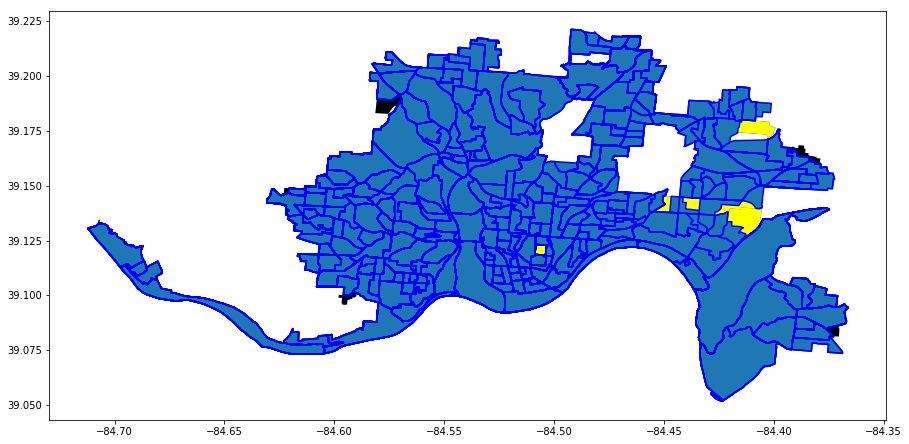

In [53]:
fig, ax = plt.subplots(figsize=(15,15))
#cinci_census.plot(ax=ax, color='grey',alpha=0.1)
#cinci_census.boundary.plot(ax=ax, color='black', alpha=0.2)
cinbdry.plot(ax=ax, color='black',linewidth=2)
#cinbdry.boundary.plot(ax=ax, color='black',linewidth=2)

#cintracts.boundary.plot(ax=ax, color='yellow',alpha=0.4)
cintracts.plot(ax=ax, color='yellow')
cinbg.boundary.plot(ax=ax, color='blue')
cinbg.plot(ax=ax)

In [46]:
len(cinbg.GIDBG.unique())

277

### Facilities

In [44]:
def facility_within_city(geo_df, citybdry):
    """takes geopandas dataframe and returns the points that are within the Tempe buffer
    Args:
        geo_df (geopandas dataframe) - geopandas dataframe to pull points from
        citybdry - geopandas dataframe made of the city mile buffer
    Returns:
        df_mi - new geopandas dataframe that the points within the Cincinnati buffer
    """
    df_mi = pd.DataFrame()
    for i in range(len(citybdry)):
        df = geo_df[geo_df.within(citybdry.loc[i,'geometry'])]
        df_mi = df_mi.append(df)
    df_mi.reset_index(inplace=True)
    df_mi.drop(['index'], axis=1, inplace=True)
    return(df_mi)

In [45]:
facilities_2mi = pd.read_csv('DataFiles/FacilitiesWithin2milesCinFull.csv')

facilities_2mi.drop(['Unnamed: 0'], axis=1, inplace=True)

facilities_2mi.head()

,Name,Type,Zip,Lat,Long,geometry
0,St. Elizabeth Ft. Thomas,HospitalsGeneral,41075,39.078705,-84.466896,POINT (-84.4668956281206 39.07870495)
1,DANIEL DRAKE CENTER FOR POST-ACUTE CARE,HospitalsGeneral,45216,39.213279,-84.478683,POINT (-84.47868299999999 39.213279)
2,Encompass Health Rehabilitation Hospital of Ci...,HospitalsGeneral,45216,39.213279,-84.478683,POINT (-84.47868299999999 39.213279)
3,CHRIST HOSPITAL,HospitalsGeneral,45219,39.121175,-84.508677,POINT (-84.50867700000001 39.121175)
4,DANIEL DRAKE CENTER FOR POST-ACUTE CARE,HospitalsGeneral,45219,39.121175,-84.508677,POINT (-84.50867700000001 39.121175)


In [10]:
facilities_2mi.dtypes

Name         object
Type         object
Zip          object
Lat         float64
Long        float64
geometry     object
dtype: object

In [46]:
from shapely import wkt

facilities_2mi['geometry'] = facilities_2mi['geometry'].apply(wkt.loads)
facilities_2mi = facilities_2mi.set_geometry('geometry')
len(facilities_2mi)

497

In [47]:
facilities_cin = facility_within_city(facilities_2mi, cinbdry)
len(facilities_cin)

281

In [48]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import mplleaflet as mpll


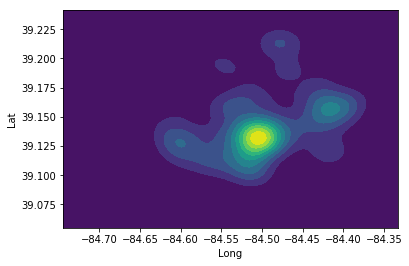

In [15]:
sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], shade=True, cmap='viridis');


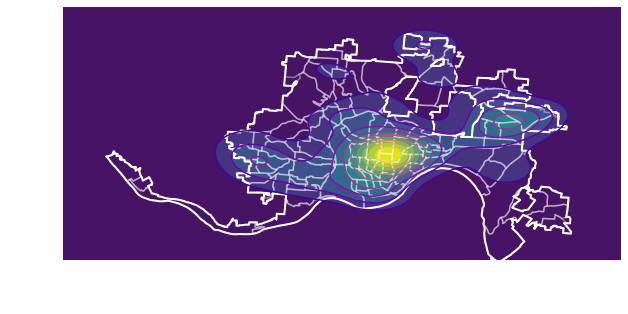

In [17]:
f, ax = plt.subplots(figsize=(10, 10))

cintracts.boundary.plot(ax=ax, color='white',alpha=0.4)
cinbdry.boundary.plot(ax=ax, color='white',linewidth=2)

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=False, cmap='plasma', \
            ax=ax);
sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=True, cmap='viridis', \
            ax=ax);
ax.set_axis_off()
#plt.axis('equal')
plt.show()

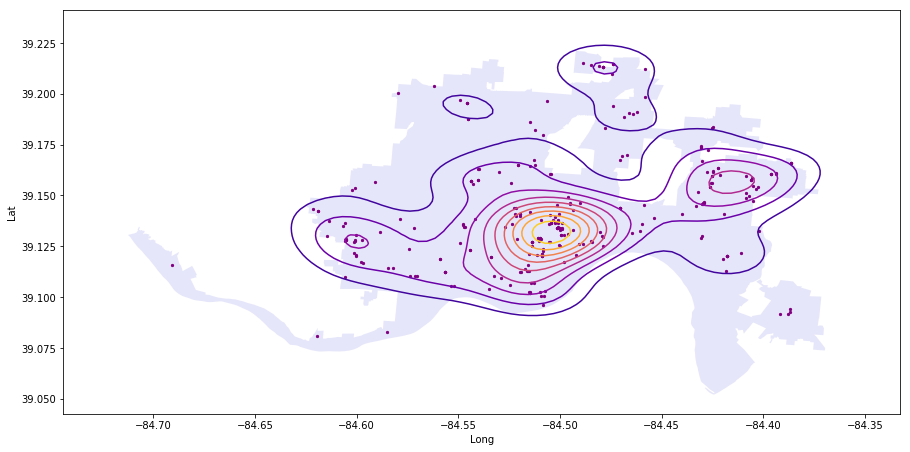

In [18]:
f, ax = plt.subplots(figsize=(15, 15))

#cintracts.boundary.plot(ax=ax, color='grey',alpha=0.4)
cinbdry.plot(ax=ax, color='lavender',linewidth=2)



sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=False, cmap='plasma', \
            ax=ax);

facilities_cin.plot(ax=ax,color='purple', markersize=5)

### EMS

In [49]:
cin_ems = pd.read_csv('cincinnatiEMS_2_28_20.csv')
cin_ems.dtypes
cin_ems['geometry'] = cin_ems['geometry'].apply(wkt.loads)
cin_ems = cin_ems.set_geometry('geometry')
cin_ems.drop(['Unnamed: 0'], axis=1, inplace=True)
cin_ems['LONGITUDE_X'] = cin_ems['LONGITUDE_X'].astype(float)
cin_ems['LATITUDE_X'] = cin_ems['LATITUDE_X'].astype(float)
cin_ems.head()

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP,COMMUNITY_COUNCIL_NEIGHBORHOOD,Year,geometry
0,SYCAMORE ST,39.105540,-84.509106,CFD,2019-03-16 20:57:46,MEDT: MEDIC TRANSPORT,CFD190316000189,23C5,"NARCOTICS (HEROIN, MORPHINE, METHADONE, OXYCON...",DOWNTOWN,03/16/2019 09:01:04 PM,ST03,03/16/2019 09:30:13 PM,03/16/2019 08:58:08 PM,ALS,OVERDOSE / POSIONING (INGESTION),DOWNTOWN,2019,POINT (-84.50911 39.10554)
1,MONTANA AV,39.153776,-84.580732,CFD,2019-07-05 21:27:41,EMSF: FALSE,CFD190705000234,23C5,"NARCOTICS (HEROIN, MORPHINE, METHADONE, OXYCON...",WESTWOOD,07/05/2019 09:32:27 PM,ST20,07/05/2019 09:40:10 PM,07/05/2019 09:27:57 PM,ALS,OVERDOSE / POSIONING (INGESTION),WESTWOOD,2019,POINT (-84.58073 39.15378)
2,WALNUT ST,39.112685,-84.514453,CFD,2019-07-06 21:50:50,MEDT: MEDIC TRANSPORT,CFD190706000204,23C5,"NARCOTICS (HEROIN, MORPHINE, METHADONE, OXYCON...",OVER-THE-RHINE,07/06/2019 09:55:52 PM,ST05,07/06/2019 10:23:47 PM,07/06/2019 09:53:30 PM,ALS,OVERDOSE / POSIONING (INGESTION),OTR,2019,POINT (-84.51445 39.11269)
3,WILLIAMSBURG DR,39.156110,-84.561922,CFD,2019-07-27 01:00:05,MEDD: MT DISREGARDED,CFD190727000013,23C5,"NARCOTICS (HEROIN, MORPHINE, METHADONE, OXYCON...",VILLAGES AT ROLL HILL,07/27/2019 01:07:16 AM,ST12,07/27/2019 01:13:46 AM,07/27/2019 01:00:32 AM,ALS,OVERDOSE / POSIONING (INGESTION),VILLAGES AT ROLL HILL,2019,POINT (-84.56192 39.15611)
4,READING RD,39.125273,-84.503087,CFD,2019-08-22 01:02:06,MEDT: MEDIC TRANSPORT,CFD190822000005,23C5,"NARCOTICS (HEROIN, MORPHINE, METHADONE, OXYCON...",MT. AUBURN,08/22/2019 01:06:44 AM,ST19,08/22/2019 01:29:53 AM,08/22/2019 01:02:25 AM,ALS,OVERDOSE / POSIONING (INGESTION),MOUNT AUBURN,2019,POINT (-84.50309 39.12527)


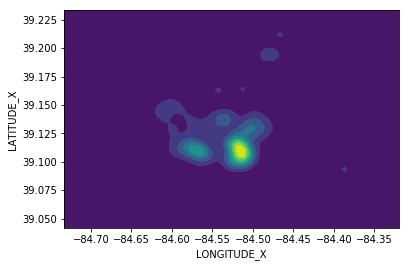

In [50]:
sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], shade=True, cmap='viridis');


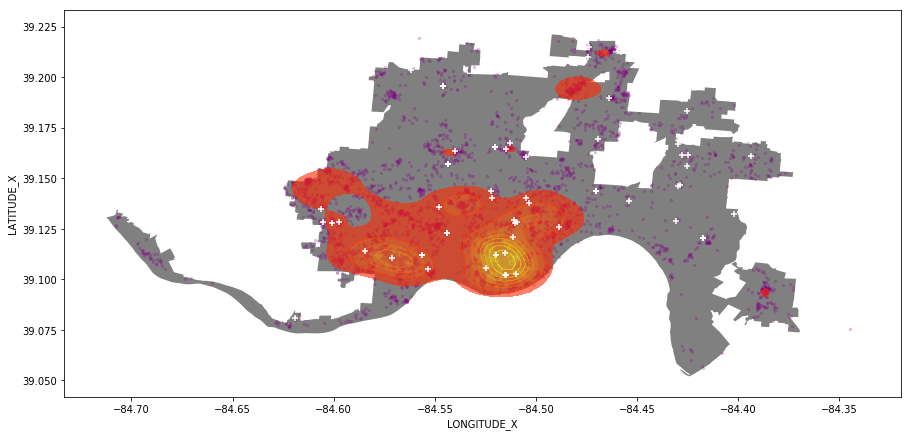

In [182]:
f, ax = plt.subplots(figsize=(15, 15))

#cintracts.boundary.plot(ax=ax, color='grey',alpha=0.4)
cinbdry.plot(ax=ax, color='grey',linewidth=2)
cin_ems.plot(ax=ax,color='purple', markersize=5,alpha=0.2)

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=True, cmap='autumn', \
            ax=ax,shade_lowest=False,alpha=0.6);



nalox.plot(ax=ax, color='white',label='Naloxone Dist.',marker='+')
#ax.legend()

### Census Information

In [51]:
cin_census = pd.read_csv('cincinnati_census.csv')
cin_census.drop(['Unnamed: 0'], axis=1, inplace=True)
cin_census.dtypes


GIDTR                                 int64
State                                 int64
State_name                           object
County                                int64
County_name                          object
Tract                                 int64
Flag                                float64
Num_BGs_in_Tract                    float64
LAND_AREA                           float64
AIAN_LAND                           float64
URBANIZED_AREA_POP_CEN_2010         float64
URBAN_CLUSTER_POP_CEN_2010          float64
RURAL_POP_CEN_2010                  float64
Tot_Population_CEN_2010             float64
Tot_Population_ACS_13_17            float64
Tot_Population_ACSMOE_13_17         float64
Males_CEN_2010                      float64
Males_ACS_13_17                     float64
Males_ACSMOE_13_17                  float64
Females_CEN_2010                    float64
Females_ACS_13_17                   float64
Females_ACSMOE_13_17                float64
Median_Age_ACS_13_17            

In [35]:
for i in cin_census.columns:
    print(i)

GIDTR
State
State_name
County
County_name
Tract
Flag
Num_BGs_in_Tract
LAND_AREA
AIAN_LAND
URBANIZED_AREA_POP_CEN_2010
URBAN_CLUSTER_POP_CEN_2010
RURAL_POP_CEN_2010
Tot_Population_CEN_2010
Tot_Population_ACS_13_17
Tot_Population_ACSMOE_13_17
Males_CEN_2010
Males_ACS_13_17
Males_ACSMOE_13_17
Females_CEN_2010
Females_ACS_13_17
Females_ACSMOE_13_17
Median_Age_ACS_13_17
Median_Age_ACSMOE_13_17
Pop_under_5_CEN_2010
Pop_under_5_ACS_13_17
Pop_under_5_ACSMOE_13_17
Pop_5_17_CEN_2010
Pop_5_17_ACS_13_17
Pop_5_17_ACSMOE_13_17
Pop_18_24_CEN_2010
Pop_18_24_ACS_13_17
Pop_18_24_ACSMOE_13_17
Pop_25_44_CEN_2010
Pop_25_44_ACS_13_17
Pop_25_44_ACSMOE_13_17
Pop_45_64_CEN_2010
Pop_45_64_ACS_13_17
Pop_45_64_ACSMOE_13_17
Pop_65plus_CEN_2010
Pop_65plus_ACS_13_17
Pop_65plus_ACSMOE_13_17
Tot_GQ_CEN_2010
Inst_GQ_CEN_2010
Non_Inst_GQ_CEN_2010
Hispanic_CEN_2010
Hispanic_ACS_13_17
Hispanic_ACSMOE_13_17
NH_White_alone_CEN_2010
NH_White_alone_ACS_13_17
NH_White_alone_ACSMOE_13_17
NH_Blk_alone_CEN_2010
NH_Blk_alone_ACS_1

In [52]:
cen_combined_cin = pd.DataFrame()

cen_combined_cin['Tract'] = cin_census['Tract']
cen_combined_cin['Population_total_ACS'] = cin_census['Tot_Population_ACS_13_17']
cen_combined_cin['Median_Income_ACS'] = cin_census['Med_HHD_Inc_ACS_13_17']
cen_combined_cin['MultiUnits_2_9'] = cin_census['MLT_U2_9_STRC_ACS_13_17']
cen_combined_cin['MultiUnits_10up'] =cin_census['MLT_U10p_ACS_13_17']

In [53]:

new = []
for i in cen_combined_cin['Median_Income_ACS']:
    tn = i[1:]
    t = tn.replace(',', '')
    t = t.replace(' ', '')
    t = int(t)
    new.append(t)
cen_combined_cin['Median_Income_ACS'] = new
cen_combined_cin.dtypes

Tract                     int64
Population_total_ACS    float64
Median_Income_ACS         int64
MultiUnits_2_9          float64
MultiUnits_10up         float64
dtype: object

In [57]:
census_cin = cen_combined_cin.merge(cintracts, left_on='Tract', right_on='TRACTCE10')
census_cin.head()
census_cin.dtypes

Tract                               int64
Population_total_ACS              float64
Median_Income_ACS                   int64
MultiUnits_2_9                    float64
MultiUnits_10up                   float64
OBJECTID_1                          int64
TRACTCE10                         float64
OBJECTID_2                          int64
CAGIS.Cinc_City_Boundary.AREA      object
PERIMETER                         float64
BND_NAME                           object
SQMI                              float64
GLOBALID                           object
SHAPE.AREA                        float64
SHAPE.LEN                         float64
CREATED_USER                       object
CREATED_DATE                       object
LAST_EDITED_USER                   object
LAST_EDITED_DATE                   object
geometry                         geometry
dtype: object

In [58]:
gdf = gpd.GeoDataFrame(census_cin, geometry=census_cin['geometry'])

In [59]:
census_cin['Population_total_ACS'] = census_cin['Population_total_ACS'].astype(float)
lst = list(census_cin['Population_total_ACS'])
print(min(lst))
print(max(lst))


780.0
6487.0


In [75]:
gdf['Tract']

0        200
1        700
2        900
3       1000
4       1100
5       1600
6       1700
7       1800
8       1900
9       2000
10      2200
11      2300
12      2600
13      2700
14      2800
15      2900
16      3000
17      3200
18      3300
19      3600
20      3700
21      3800
22      3900
23      4000
24      4100
25      4200
26      4500
27      4602
28      4603
29      4604
       ...  
78      9600
79      9700
80      9901
81      9902
82     10002
83     10003
84     10004
85     10005
86     10100
87     10201
88     10202
89     10300
90     10400
91     10500
92     10600
93     10700
94     10800
95     10900
96     11000
97     11100
98     26300
99     26400
100    26500
101    26600
102    26700
103    26800
104    26900
105    27000
106    27100
107    27200
Name: Tract, Length: 108, dtype: int64

In [100]:
print(np.unique(facilities_cin['Type']))

hospitals = facilities_cin[facilities_cin['Type'] == 'HospitalsGeneral']
urgent = facilities_cin[facilities_cin['Type'] == 'UrgentCare']
nalox = facilities_cin[facilities_cin['Type'] == 'Naloxone']

['DrugDropOff' 'Hospice' 'HospitalsChild' 'HospitalsGeneral'
 'HospitalsPsych' 'MedicalFacility' 'Mental' 'Naloxone' 'NursingAssisted'
 'PainManagement' 'Pharmacy' 'PhysicalTherapy' 'SubstanceHelp' 'Surgery'
 'UrgentCare' 'WomensClinic']


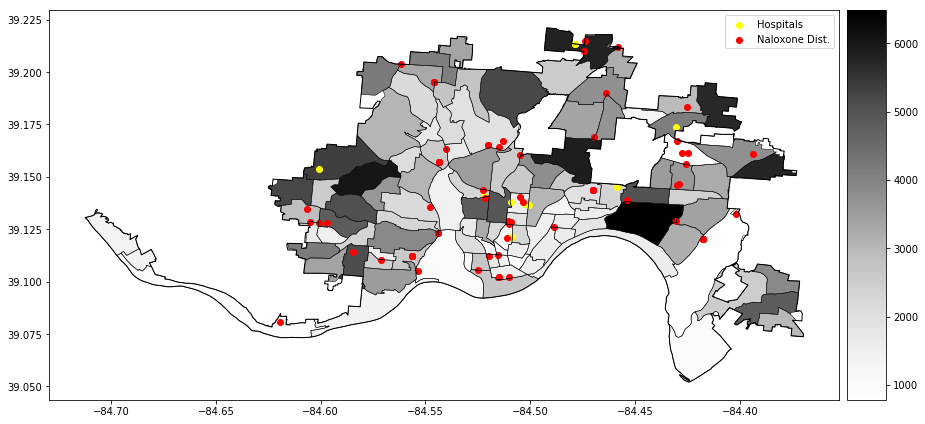

In [107]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, ax = plt.subplots(figsize=(15, 15))
cinbdry.plot(ax=ax, color='white')
cinbdry.boundary.plot(ax=ax, color='black',linewidth=1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.boundary.plot(ax=ax,color='black',linewidth=0.5)
gdf.plot(column='Population_total_ACS',ax=ax,cmap='Greys', legend=True, cax=cax)
hospitals.plot(ax=ax,color='yellow',label='Hospitals')
nalox.plot(ax=ax, color='red',label='Naloxone Dist.')
ax.legend()

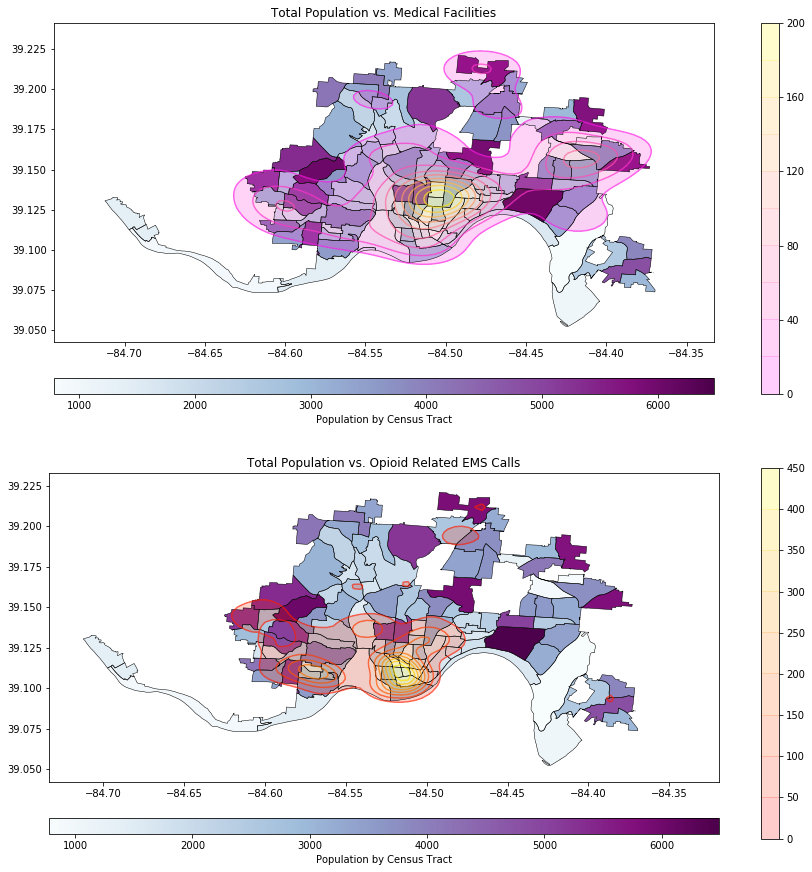

In [174]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, (ax1, ax2) = plt.subplots(2,figsize=(15, 15))
cinbdry.plot(ax=ax, color='white')
cinbdry.boundary.plot(ax=ax, color='black',linewidth=1)

divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax1 = divider1.append_axes("bottom", size="5%", pad=0.5)
cax2 = divider2.append_axes("bottom", size="5%", pad=0.5)

gdf.boundary.plot(ax=ax1,color='black',linewidth=0.5)
gdf.plot(column='Population_total_ACS',ax=ax1,cmap='BuPu', legend=True,
         legend_kwds={'label': "Population by Census Tract",
                      'orientation': "horizontal"},cax=cax1)
gdf.boundary.plot(ax=ax2,color='black',linewidth=0.5)
gdf.plot(column='Population_total_ACS',ax=ax2,cmap='BuPu', legend=True, 
         legend_kwds={'label': "Population by Census Tract",
                      'orientation': "horizontal"},cax=cax2)

import matplotlib.patches as mpatches
import numpy as np

#cmaps = ['plasma', 'autumn']
#name = ['Medical Facilities', 'EMS Calls']


#label_patches = []
#for i, cmap in enumerate(cmaps):
#    label = name[i]
#    label_patch = mpatches.Patch(
#        color=sns.color_palette(cmaps[i])[2],
#        label=label)
#    label_patches.append(label_patch)

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=True, cmap='spring', \
            ax=ax1,alpha=0.2,shade_lowest=False,cbar=True);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=True, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.2,cbar=True);

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=False, cmap='spring', \
            ax=ax1,shade_lowest=False,alpha=0.6);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=False, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.6);

#plt.legend(handles=label_patches, loc='upper right')
ax1.set_title('Total Population vs. Medical Facilities')
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax2.set_title('Total Population vs. Opioid Related EMS Calls')
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

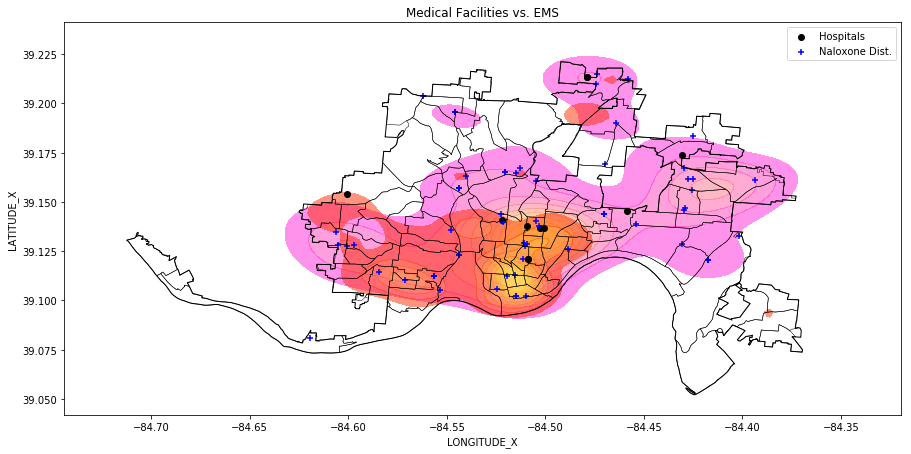

In [176]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, ax = plt.subplots(figsize=(15, 15))
cinbdry.plot(ax=ax, color='white')
cinbdry.boundary.plot(ax=ax, color='black',linewidth=1)

#divider = make_axes_locatable(ax1)

#cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.boundary.plot(ax=ax,color='black',linewidth=0.5)
gdf.plot(column='Population_total_ACS',ax=ax1,cmap='Greys', legend=True)


import matplotlib.patches as mpatches
import numpy as np

#cmaps = ['plasma', 'autumn']
#name = ['Medical Facilities', 'EMS Calls']


#label_patches = []
#for i, cmap in enumerate(cmaps):
#    label = name[i]
#    label_patch = mpatches.Patch(
#        color=sns.color_palette(cmaps[i])[2],
#        label=label)
#    label_patches.append(label_patch)

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=True, cmap='spring', \
            ax=ax,alpha=0.5,shade_lowest=False);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=True, cmap='autumn', \
            ax=ax,shade_lowest=False,alpha=0.5);

hospitals.plot(ax=ax,color='black',label='Hospitals')
nalox.plot(ax=ax, color='blue',label='Naloxone Dist.',marker='+')
ax.legend()
ax.set_title('Medical Facilities vs. EMS')

ax.set_aspect('equal')

#plt.legend(handles=label_patches, loc='upper right')

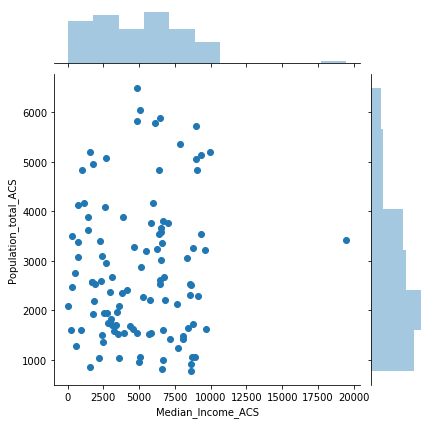

In [151]:
sns.jointplot(x="Median_Income_ACS", y="Population_total_ACS", data=gdf)
#plt.title('Cincinnati Median Income vs. Population Total')

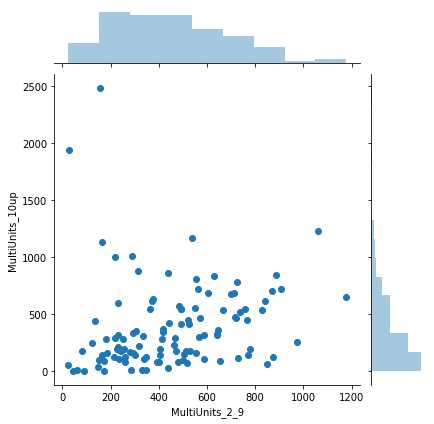

In [160]:
sns.jointplot(x="MultiUnits_2_9", y="MultiUnits_10up", data=gdf)

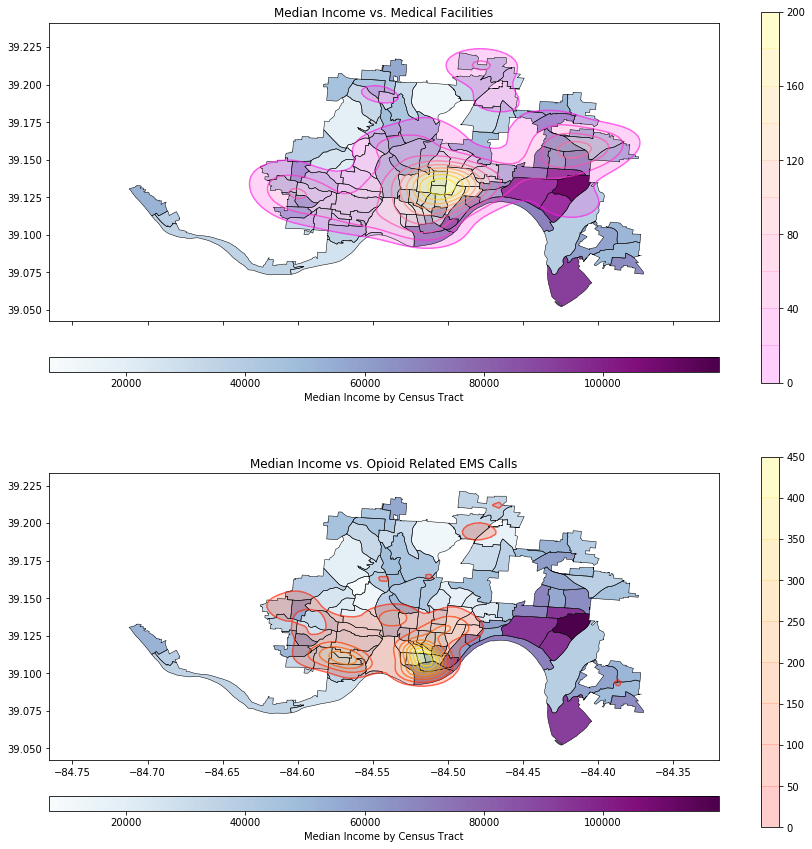

In [178]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, (ax1, ax2) = plt.subplots(2,figsize=(15, 15),sharex=True)
cinbdry.plot(ax=ax, color='white')
cinbdry.boundary.plot(ax=ax, color='black',linewidth=1)

divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax1 = divider1.append_axes("bottom", size="5%", pad=0.5)
cax2 = divider2.append_axes("bottom", size="5%", pad=0.5)

gdf.boundary.plot(ax=ax1,color='black',linewidth=0.5)
gdf.plot(column='Median_Income_ACS',ax=ax1,cmap='BuPu', legend=True,
         legend_kwds={'label': "Median Income by Census Tract",
                      'orientation': "horizontal"},cax=cax1)
gdf.boundary.plot(ax=ax2,color='black',linewidth=0.5)
gdf.plot(column='Median_Income_ACS',ax=ax2,cmap='BuPu', legend=True, 
         legend_kwds={'label': "Median Income by Census Tract",
                      'orientation': "horizontal"},cax=cax2)

import matplotlib.patches as mpatches
import numpy as np

#cmaps = ['plasma', 'autumn']
#name = ['Medical Facilities', 'EMS Calls']


#label_patches = []
#for i, cmap in enumerate(cmaps):
#    label = name[i]
#    label_patch = mpatches.Patch(
#        color=sns.color_palette(cmaps[i])[2],
#        label=label)
#    label_patches.append(label_patch)

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=True, cmap='spring', \
            ax=ax1,alpha=0.2,shade_lowest=False,cbar=True);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=True, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.2,cbar=True);

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=False, cmap='spring', \
            ax=ax1,shade_lowest=False,alpha=0.6);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=False, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.6);

#plt.legend(handles=label_patches, loc='upper right')
ax1.set_title('Median Income vs. Medical Facilities')
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax2.set_title('Median Income vs. Opioid Related EMS Calls')
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

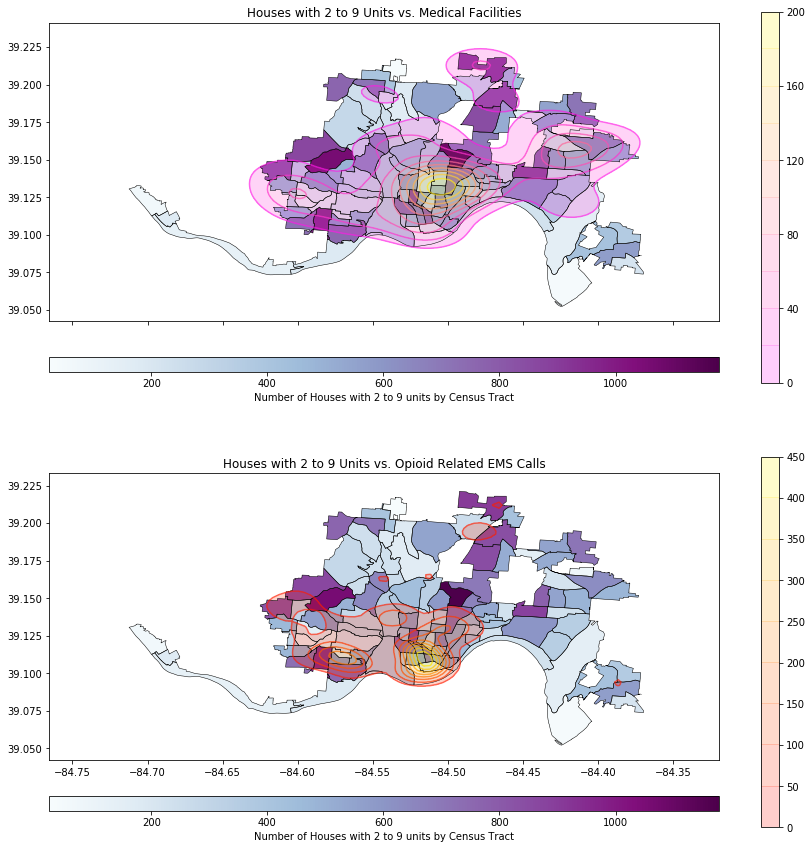

In [179]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, (ax1, ax2) = plt.subplots(2,figsize=(15, 15),sharex=True)
cinbdry.plot(ax=ax, color='white')
cinbdry.boundary.plot(ax=ax, color='black',linewidth=1)

divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax1 = divider1.append_axes("bottom", size="5%", pad=0.5)
cax2 = divider2.append_axes("bottom", size="5%", pad=0.5)

gdf.boundary.plot(ax=ax1,color='black',linewidth=0.5)
gdf.plot(column='MultiUnits_2_9',ax=ax1,cmap='BuPu', legend=True,
         legend_kwds={'label': "Number of Houses with 2 to 9 units by Census Tract",
                      'orientation': "horizontal"},cax=cax1)
gdf.boundary.plot(ax=ax2,color='black',linewidth=0.5)
gdf.plot(column='MultiUnits_2_9',ax=ax2,cmap='BuPu', legend=True, 
         legend_kwds={'label': "Number of Houses with 2 to 9 units by Census Tract",
                      'orientation': "horizontal"},cax=cax2)

import matplotlib.patches as mpatches
import numpy as np

#cmaps = ['plasma', 'autumn']
#name = ['Medical Facilities', 'EMS Calls']


#label_patches = []
#for i, cmap in enumerate(cmaps):
#    label = name[i]
#    label_patch = mpatches.Patch(
#        color=sns.color_palette(cmaps[i])[2],
#        label=label)
#    label_patches.append(label_patch)

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=True, cmap='spring', \
            ax=ax1,alpha=0.2,shade_lowest=False,cbar=True);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=True, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.2,cbar=True);

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=False, cmap='spring', \
            ax=ax1,shade_lowest=False,alpha=0.6);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=False, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.6);

#plt.legend(handles=label_patches, loc='upper right')
ax1.set_title('Houses with 2 to 9 Units vs. Medical Facilities')
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax2.set_title('Houses with 2 to 9 Units vs. Opioid Related EMS Calls')
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

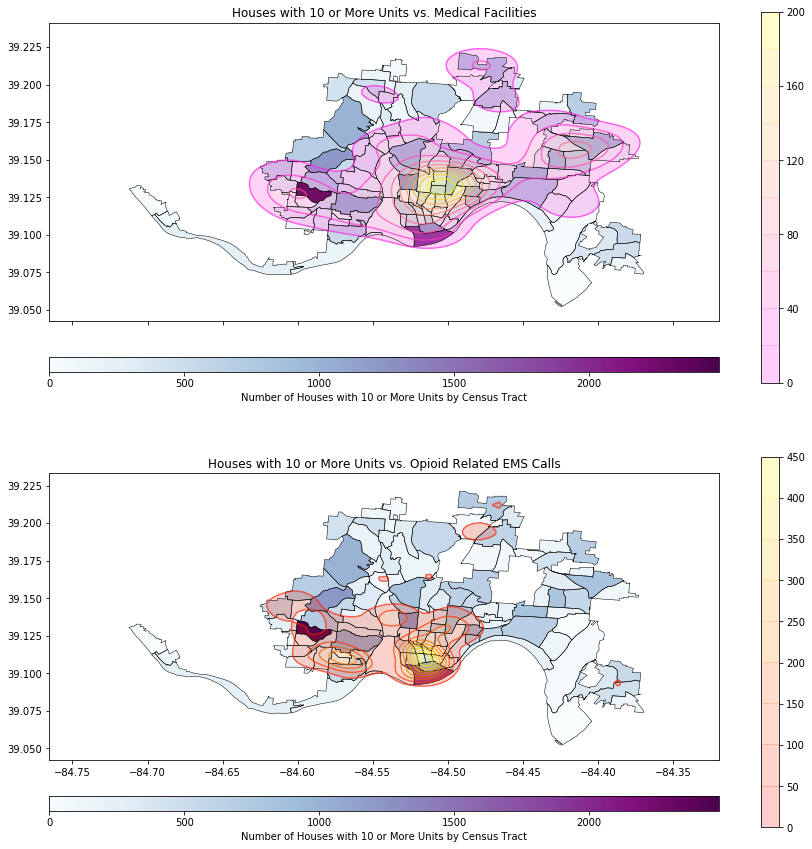

In [180]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, (ax1, ax2) = plt.subplots(2,figsize=(15, 15),sharex=True)
cinbdry.plot(ax=ax, color='white')
cinbdry.boundary.plot(ax=ax, color='black',linewidth=1)

divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax1 = divider1.append_axes("bottom", size="5%", pad=0.5)
cax2 = divider2.append_axes("bottom", size="5%", pad=0.5)

gdf.boundary.plot(ax=ax1,color='black',linewidth=0.5)
gdf.plot(column='MultiUnits_10up',ax=ax1,cmap='BuPu', legend=True,
         legend_kwds={'label': "Number of Houses with 10 or More Units by Census Tract",
                      'orientation': "horizontal"},cax=cax1)
gdf.boundary.plot(ax=ax2,color='black',linewidth=0.5)
gdf.plot(column='MultiUnits_10up',ax=ax2,cmap='BuPu', legend=True, 
         legend_kwds={'label': "Number of Houses with 10 or More Units by Census Tract",
                      'orientation': "horizontal"},cax=cax2)

import matplotlib.patches as mpatches
import numpy as np

#cmaps = ['plasma', 'autumn']
#name = ['Medical Facilities', 'EMS Calls']


#label_patches = []
#for i, cmap in enumerate(cmaps):
#    label = name[i]
#    label_patch = mpatches.Patch(
#        color=sns.color_palette(cmaps[i])[2],
#        label=label)
#    label_patches.append(label_patch)

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=True, cmap='spring', \
            ax=ax1,alpha=0.2,shade_lowest=False,cbar=True);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=True, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.2,cbar=True);

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=False, cmap='spring', \
            ax=ax1,shade_lowest=False,alpha=0.6);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=False, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.6);

#plt.legend(handles=label_patches, loc='upper right')
ax1.set_title('Houses with 10 or More Units vs. Medical Facilities')
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax2.set_title('Houses with 10 or More Units vs. Opioid Related EMS Calls')
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

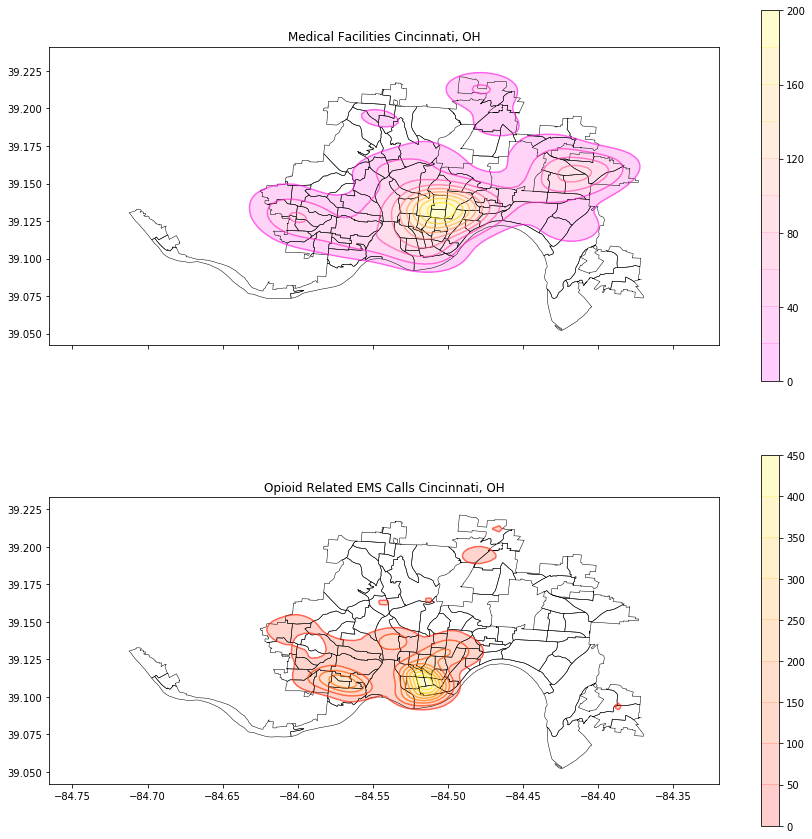

In [60]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, (ax1, ax2) = plt.subplots(2,figsize=(15, 15),sharex=True)
cinbdry.plot(ax=ax, color='white')
cinbdry.boundary.plot(ax=ax, color='black',linewidth=1)


gdf.boundary.plot(ax=ax1,color='black',linewidth=0.5)

gdf.boundary.plot(ax=ax2,color='black',linewidth=0.5)


import matplotlib.patches as mpatches
import numpy as np


sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=True, cmap='spring', \
            ax=ax1,alpha=0.2,shade_lowest=False,cbar=True);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=True, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.2,cbar=True);

sns.kdeplot(facilities_cin['Long'], facilities_cin['Lat'], \
            shade=False, cmap='spring', \
            ax=ax1,shade_lowest=False,alpha=0.6);

sns.kdeplot(cin_ems['LONGITUDE_X'], cin_ems['LATITUDE_X'], \
            shade=False, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.6);

#plt.legend(handles=label_patches, loc='upper right')
ax1.set_title('Medical Facilities Cincinnati, OH')
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax2.set_title('Opioid Related EMS Calls Cincinnati, OH')
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

# Tempe

In [13]:
facilities_2mi_temp = pd.read_csv('DataFiles/FacilitiesWithin2milesTempeFull.csv')

facilities_2mi_temp.drop(['Unnamed: 0'], axis=1, inplace=True)

facilities_2mi_temp

,Name,Type,Zip,Lat,Long,geometry
0,ARIZONA SPECIALTY HOSPITAL,HospitalsGeneral,85224,33.334700,-111.891218,POINT (-111.891218 33.3347)
1,BANNER DESERT MEDICAL CENTER,HospitalsGeneral,85202,33.390773,-111.874786,POINT (-111.874786 33.390773)
2,"TEMPE ST LUKE'S HOSPITAL, A CAMPUS OF ST LUKE'...",HospitalsGeneral,85281,33.412378,-111.940084,POINT (-111.940084 33.412378)
3,O.A.S.I.S. HOSPITAL,HospitalsGeneral,85008,33.456559,-111.995377,POINT (-111.995377 33.456559)
4,GREENBAUM SPECIALTY SURGICAL HOSPITAL,HospitalsGeneral,85251,33.489968,-111.925891,POINT (-111.925891 33.489968)
5,SCOTTSDALE OSBORN MEDICAL CENTER,HospitalsGeneral,85251,33.487776,-111.922888,POINT (-111.922888 33.487776)
6,AURORA BEHAVIORAL HEALTHCARE-TEMPE,HospitalsPsych,85283,33.364115,-111.938600,POINT (-111.9386 33.364115)
7,BANNER BEHAVIORAL HEALTH HOSPITAL,HospitalsPsych,85251,33.483854,-111.918339,POINT (-111.918339 33.483854)
8,SCOTTSDALE VILLAGE SQUARE,NursingAssisted,85257,33.477617,-111.934932,POINT (-111.934932 33.477617)
9,OSBORN HEALTH AND REHABILITATION,NursingAssisted,85251,33.480000,-111.920000,POINT (-111.92 33.48)


In [16]:
facilities_2mi_temp.dtypes

Name         object
Type         object
Zip           int64
Lat         float64
Long        float64
geometry     object
dtype: object

In [14]:
facilities_2mi_temp['geometry'] = facilities_2mi_temp['geometry'].apply(wkt.loads)
facilities_2mi_temp = facilities_2mi_temp.set_geometry('geometry')

In [20]:
#census blocks
tempetract = pd.read_csv('TempeCensusPulled.csv')

tempetract.drop(['Unnamed: 0'], axis=1, inplace=True)

tempetract

,TempeTracts_NAME,PctPopUnder5,PctPop5_17,PctPop18_24,PctPop25_44,PctPop45_64,PctPop65_Up,PctEmpUnder16,PctEmp16_24,PctEmp25_44,...,PctUnemp16_24,PctUnemp25_44,PctUnemp45_64,PctCollegeGrad,PctNotHSGrad,PctNoHealthIns,PctOneHealthIns,PctTwoHealthIns,PctBelowPoverty,geometry
0,3188.00,3.31,5.66,34.89,40.73,10.60,4.81,96.81,97.12,96.58,...,2.88,3.42,2.32,12.68,39.62,21.51,66.77,11.72,31.48,"POLYGON ((-111.961324999619 33.4371869993457, ..."
1,3191.01,2.96,7.20,62.63,21.26,5.95,0.00,87.71,91.14,83.30,...,8.86,16.70,16.95,16.26,36.48,23.23,70.40,6.37,73.11,"POLYGON ((-111.926293000195 33.4191529990701, ..."
2,3189.00,3.38,6.06,31.45,31.21,19.71,8.20,93.78,95.67,92.52,...,4.33,7.48,7.35,8.23,49.23,14.98,72.25,12.77,27.87,"POLYGON ((-111.960895999762 33.4219539993975, ..."
3,3190.00,0.82,2.07,81.56,10.22,3.72,1.60,88.55,85.07,100.00,...,14.93,0.00,0.00,0.00,63.30,10.87,77.17,11.96,34.24,"POLYGON ((-111.943580000341 33.4150549990933, ..."
4,3194.03,5.90,16.18,10.82,29.77,23.43,13.90,93.86,94.95,97.73,...,5.05,2.27,13.32,4.53,38.78,15.67,67.41,16.80,21.39,"POLYGON ((-111.909122000199 33.3941089991188, ..."
5,3197.03,6.07,6.51,16.94,32.26,18.36,19.86,90.04,93.42,88.19,...,6.58,11.81,9.74,3.64,29.69,13.51,68.45,18.05,16.98,"POLYGON ((-111.978426000188 33.3927799994428, ..."
6,3194.04,5.18,4.38,13.38,27.38,19.92,29.76,94.32,81.89,96.27,...,18.11,3.73,1.18,3.24,42.57,7.54,66.28,21.75,9.48,"POLYGON ((-111.892483000012 33.3809489988792, ..."
7,3195.00,4.81,8.49,24.52,31.64,20.76,9.78,96.46,97.79,95.18,...,2.21,4.82,3.39,2.86,40.31,10.93,74.33,14.46,20.41,"POLYGON ((-111.926319999809 33.3946719988325, ..."
8,3197.04,6.30,12.34,18.70,35.48,19.54,7.65,92.40,95.26,92.36,...,4.74,7.64,11.26,9.23,37.74,12.66,75.19,12.15,20.12,"POLYGON ((-111.978498000284 33.4365249988884, ..."
9,3196.00,4.31,13.73,11.75,34.38,21.39,14.43,96.16,95.03,96.31,...,4.97,3.69,2.41,4.00,43.03,17.28,70.19,12.07,14.45,"POLYGON ((-111.943521000044 33.3961379987021, ..."


In [21]:
tempetract.dtypes

TempeTracts_NAME    float64
PctPopUnder5        float64
PctPop5_17          float64
PctPop18_24         float64
PctPop25_44         float64
PctPop45_64         float64
PctPop65_Up         float64
PctEmpUnder16       float64
PctEmp16_24         float64
PctEmp25_44         float64
PctEmp45_64         float64
PctUnempUnder16     float64
PctUnemp16_24       float64
PctUnemp25_44       float64
PctUnemp45_64       float64
PctCollegeGrad      float64
PctNotHSGrad        float64
PctNoHealthIns      float64
PctOneHealthIns     float64
PctTwoHealthIns     float64
PctBelowPoverty     float64
geometry             object
dtype: object

In [23]:
tempetract['geometry'] = tempetract['geometry'].apply(wkt.loads)
tempetract = tempetract.set_geometry('geometry')

In [24]:
turl = 'https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/City_Boundary/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
tempebdry = gpd.read_file(turl)
tempebdry.dtypes
#tempe = gpd.read_file("https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Map/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token=")


OBJECTID               int64
CityName              object
Shape_STArea__       float64
Shape_STLength__     float64
Shape__Area          float64
Shape__Length        float64
geometry            geometry
dtype: object

In [30]:
facilities_temp = facility_within_city(facilities_2mi_temp, tempebdry)
facilities_temp.dtypes

Name          object
Type          object
Zip            int64
Lat          float64
Long         float64
geometry    geometry
dtype: object

In [26]:
eurl = 'https://services.arcgis.com/lQySeXwbBg53XWDi/arcgis/rest/services/Opioid_Calls/FeatureServer/0/query?where=OBJECTID+%3E+0+&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
tempems = gpd.read_file(eurl)

In [27]:
tempems = tempems[tempems['Opioid_Use'] == 'Yes']
len(tempems)
tempems.dtypes

OBJECTID               int64
Incident_Date          int64
Weekday               object
Weekday_Sort          object
Month                 object
Month_Sort            object
Year                   int64
Opioid_Use            object
Narcan_Given          object
Age                   object
Patient_Gender        object
Patient_ASU           object
Patient_Veteran       object
Patient_Homeless      object
Latitude_Random      float64
Longitude_Random     float64
Spec_Pop              object
Notes                 object
Time_of_Day           object
geometry            geometry
dtype: object

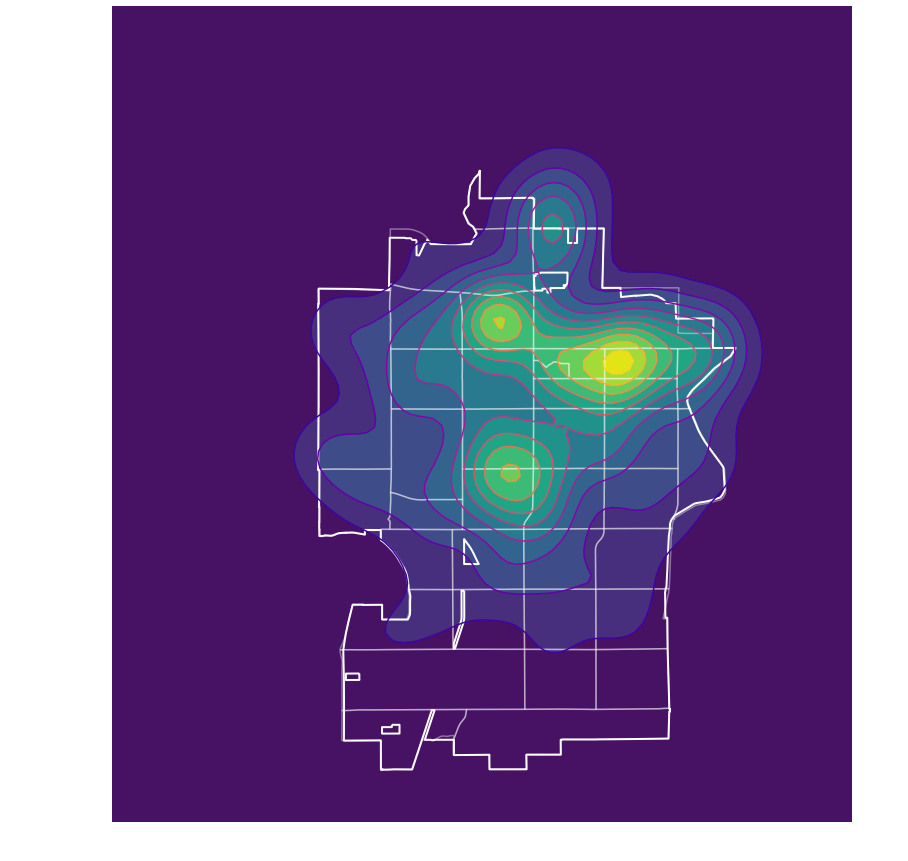

In [29]:
f, ax = plt.subplots(figsize=(15, 15))

tempetract.boundary.plot(ax=ax, color='white',alpha=0.4)
tempebdry.boundary.plot(ax=ax, color='white',linewidth=2)

sns.kdeplot(tempems['Longitude_Random'], tempems['Latitude_Random'], \
            shade=False, cmap='plasma', \
            ax=ax);
sns.kdeplot(tempems['Longitude_Random'], tempems['Latitude_Random'], \
            shade=True, cmap='viridis', \
            ax=ax);
ax.set_axis_off()
plt.axis('equal')
plt.show()

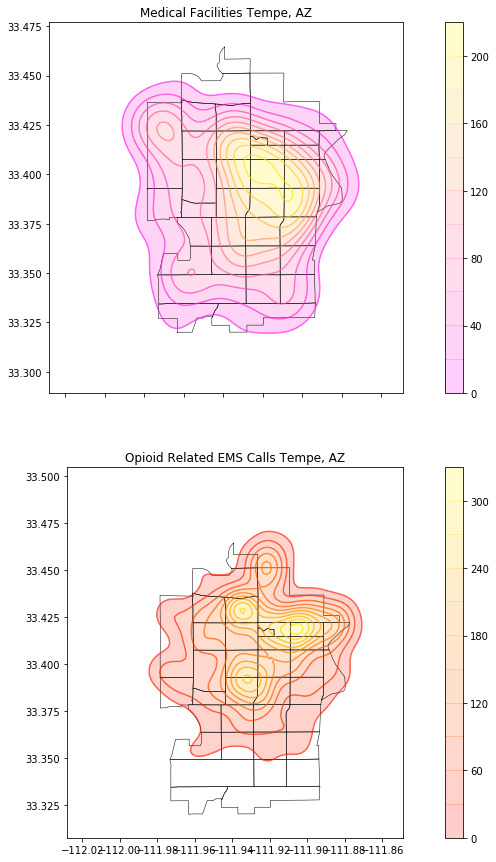

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
f, (ax1, ax2) = plt.subplots(2,figsize=(15, 15),sharex=True)

tempetract.boundary.plot(ax=ax1,color='black',linewidth=0.5)

tempetract.boundary.plot(ax=ax2,color='black',linewidth=0.5)


import matplotlib.patches as mpatches
import numpy as np

#cmaps = ['plasma', 'autumn']
#name = ['Medical Facilities', 'EMS Calls']


#label_patches = []
#for i, cmap in enumerate(cmaps):
#    label = name[i]
#    label_patch = mpatches.Patch(
#        color=sns.color_palette(cmaps[i])[2],
#        label=label)
#    label_patches.append(label_patch)

sns.kdeplot(facilities_temp['Long'], facilities_temp['Lat'], \
            shade=True, cmap='spring', \
            ax=ax1,alpha=0.2,shade_lowest=False,cbar=True);

sns.kdeplot(tempems['Longitude_Random'], tempems['Latitude_Random'], \
            shade=True, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.2,cbar=True);

sns.kdeplot(facilities_temp['Long'], facilities_temp['Lat'], \
            shade=False, cmap='spring', \
            ax=ax1,shade_lowest=False,alpha=0.6);

sns.kdeplot(tempems['Longitude_Random'], tempems['Latitude_Random'], \
            shade=False, cmap='autumn', \
            ax=ax2,shade_lowest=False,alpha=0.6);

#plt.legend(handles=label_patches, loc='upper right')

ax1.set_title('Medical Facilities Tempe, AZ')
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('', fontsize=12)
ax2.set_title('Opioid Related EMS Calls Tempe, AZ')
ax2.set_xlabel('', fontsize=12)
ax2.set_ylabel('', fontsize=12)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

#plt.legend(handles=label_patches, loc='upper right')